In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'CCTVinSeoul.csv',
 'matplotlib 연습하기.ipynb',
 'pandas 연습하기3.ipynb',
 'populationinSeoul.xls',
 '서울시 구별 CCTV 현황 분석하기.ipynb']

In [22]:
cctv_seoul = pd.read_csv('CCTVinSeoul.csv', encoding='cp949')
cctv_seoul.head()

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,91341,2804,3097,3981,6576,8850,11566,11024,13151,11912,9144,9236
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232


- 컬럼의 이름 변경
    - inplace: 리턴 값 없이 원본 데이터 변경
    
        - inplace가 없으면 원본 데이터가 변경되지 않는다.

In [23]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
print(cctv_seoul.columns)

Index(['구별', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'],
      dtype='object')


In [24]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [25]:
pop_seoul = pd.read_excel('populationinSeoul.xls', header=1, usecols='B, D, E, F, H')
pop_seoul.head()

,동별(2),계,한국인,등록외국인,65세이상고령자
0,소계,9725417,9494807,230610,1641813
1,종로구,153255,143624,9631,28170
2,중구,131673,122088,9585,24948
3,용산구,236632,222263,14369,39615
4,성동구,290664,283821,6843,47152


In [26]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자',
                         }, inplace=True)
print(pop_seoul.columns)

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')


In [27]:
# 파일 안에 데이터가 없을 경우 0 값으로 변경
cctv_seoul.fillna(value=0, inplace=True)
print(cctv_seoul.values)

[['계' 91341 2804 3097 3981 6576 8850 11566 11024 13151 11912 9144 9236]
 ['종로구' 1980 36 540 107 161 131 158 152 69 250 85 291]
 ['중 구' 2584 130 87 77 236 240 372 386 155 361 403 137]
 ['용산구' 2847 44 50 68 83 295 491 115 322 623 422 334]
 ['성동구' 4047 58 99 110 366 279 945 459 647 485 367 232]
 ['광진구' 3480 507 82 84 64 21 465 443 709 172 662 271]
 ['동대문구' 2759 1 4 12 107 802 711 201 218 223 221 259]
 ['중랑구' 4193 224 331 104 145 153 170 215 1074 976 507 294]
 ['성북구' 4842 137 170 229 322 594 811 867 714 253 407 338]
 ['강북구' 3321 0 21 16 68 210 4 375 963 569 298 797]
 ['도봉구' 2247 103 2 79 72 103 117 200 202 183 600 586]
 ['노원구' 2617 77 153 75 510 329 172 216 326 387 220 152]
 ['은평구' 4653 17 44 332 329 555 403 635 1057 288 471 522]
 ['서대문구' 3445 312 144 127 77 254 524 389 344 587 207 480]
 ['마포구' 2628 21 40 109 170 458 376 368 494 298 177 117]
 ['양천구' 3851 197 139 128 239 422 563 830 311 337 338 347]
 ['강서구' 3265 67 59 202 193 168 506 259 458 359 439 555]
 ['구로구' 4693 37 361 193 269 353 563 

- cctv가 가장 많이 설치된 구 5개

In [28]:
# 합계 행을 삭제
cctv_seoul = cctv_seoul[1:]

In [29]:
cctv_seoul.sort_values(by='총계', ascending=False).head(5)

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
23,강남구,7243,59,62,573,826,1295,989,744,790,923,514,468
21,관악구,5398,362,244,302,537,607,676,662,890,404,550,164
22,서초구,4995,74,86,70,559,518,1054,426,344,422,566,876
8,성북구,4842,137,170,229,322,594,811,867,714,253,407,338
17,구로구,4693,37,361,193,269,353,563,545,794,651,684,243


In [37]:
cctv_seoul['최근증가율'] = (cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년']+
                  cctv_seoul['2017년']+cctv_seoul['2018년']+cctv_seoul['2019년']+cctv_seoul['2020년']+cctv_seoul['2021년']
                  +cctv_seoul['2013년']) / (cctv_seoul['총계'] - cctv_seoul['2013년 이전\n설치된 CCTV']) * 100

cctv_seoul.sort_values(by='최근증가율', ascending=False)

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
21,관악구,5398,362,244,302,537,607,676,662,890,404,550,164,96.743447
14,마포구,2628,21,40,109,170,458,376,368,494,298,177,117,95.512083
17,구로구,4693,37,361,193,269,353,563,545,794,651,684,243,94.780928
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137,94.417278
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,94.184006
11,노원구,2617,77,153,75,510,329,172,216,326,387,220,152,94.015748
23,강남구,7243,59,62,573,826,1295,989,744,790,923,514,468,93.485523
8,성북구,4842,137,170,229,322,594,811,867,714,253,407,338,92.816153
7,중랑구,4193,224,331,104,145,153,170,215,1074,976,507,294,92.592593
19,영등포구,4553,109,81,295,360,285,422,803,153,1357,329,359,91.921692


In [38]:
cctv_seoul['최근증가율'] = (cctv_seoul['2015년']+cctv_seoul['2016년']+
                  cctv_seoul['2017년']+cctv_seoul['2018년']+cctv_seoul['2019년']+cctv_seoul['2020년']+cctv_seoul['2021년']+cctv_seoul['2022년']
                  ) / (cctv_seoul['2013년 이전\n설치된 CCTV']+cctv_seoul['2013년']+cctv_seoul['2014년'])  * 100
cctv_seoul.sort_values(by='최근증가율', ascending=False)

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
6,동대문구,2759,1,4,12,107,802,711,201,218,223,221,259,16129.411765
9,강북구,3321,0,21,16,68,210,4,375,963,569,298,797,8875.675676
18,금천구,2636,0,0,43,361,133,196,539,367,513,207,277,6030.232558
22,서초구,4995,74,86,70,559,518,1054,426,344,422,566,876,2071.739130
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,1657.407407
14,마포구,2628,21,40,109,170,458,376,368,494,298,177,117,1445.882353
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,1415.730337
24,송파구,3203,84,78,88,221,163,256,516,1081,224,139,353,1181.200000
10,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586,1121.195652
12,은평구,4653,17,44,332,329,555,403,635,1057,288,471,522,1083.969466


In [42]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,153255,143624,9631,28170
2,중구,131673,122088,9585,24948
3,용산구,236632,222263,14369,39615
4,성동구,290664,283821,6843,47152
5,광진구,352796,339893,12903,53009


In [44]:
print(pop_seoul['구별'].unique())

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']


In [45]:
print(cctv_seoul['구별'].unique())

['종로구' '중 구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']


In [47]:
cctv_seoul.head()

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율
1,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,189.897511
2,중 구,2584,130,87,77,236,240,372,386,155,361,403,137,778.911565
3,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,1657.407407
4,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,1415.730337
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,417.087667


In [48]:
cctv_seoul.loc[2, '구별'] = '중구'

In [49]:
print(cctv_seoul['구별'].unique())

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']


- 인구와 CCTV 테이블 조인

In [50]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result

,구별,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,최근증가율,인구수,한국인,외국인,고령자
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,189.897511,153255,143624,9631,28170
1,중구,2584,130,87,77,236,240,372,386,155,361,403,137,778.911565,131673,122088,9585,24948
2,용산구,2847,44,50,68,83,295,491,115,322,623,422,334,1657.407407,236632,222263,14369,39615
3,성동구,4047,58,99,110,366,279,945,459,647,485,367,232,1415.730337,290664,283821,6843,47152
4,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,417.087667,352796,339893,12903,53009
5,동대문구,2759,1,4,12,107,802,711,201,218,223,221,259,16129.411765,352743,337330,15413,63427
6,중랑구,4193,224,331,104,145,153,170,215,1074,976,507,294,536.267071,393147,388509,4638,73465
7,성북구,4842,137,170,229,322,594,811,867,714,253,407,338,803.358209,443823,433559,10264,76257
8,강북구,3321,0,21,16,68,210,4,375,963,569,298,797,8875.675676,300246,296653,3593,65317
9,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586,1121.195652,316916,314791,2125,65693


In [51]:
print(data_result.columns)

Index(['구별', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '최근증가율', '인구수',
       '한국인', '외국인', '고령자'],
      dtype='object')


- 필요 없는 데이터 삭제

In [52]:
del data_result['2013년 이전\n설치된 CCTV']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']
del data_result['2022년']

In [53]:
print(data_result.columns)

Index(['구별', '총계', '최근증가율', '인구수', '한국인', '외국인', '고령자'], dtype='object')


In [54]:
# 인구수와 총계의 상관계수 => 양수이므로 비례 관계
# => 인구수가 많을 수록 CCTV의 수도 영향을 받는다는 추측 가능
print(np.corrcoef(data_result['인구수'], data_result['총계']))

[[1.         0.46416063]
 [0.46416063 1.        ]]


In [55]:
# 총계 - 내림차순
data_result.sort_values(by='총계', ascending=False).head(5)

,구별,총계,최근증가율,인구수,한국인,외국인,고령자
22,강남구,7243,943.659942,536710,531777,4933,80335
20,관악구,5398,494.493392,500841,486946,13895,81247
21,서초구,4995,2071.739130,411515,407672,3843,61711
7,성북구,4842,803.358209,443823,433559,10264,76257
16,구로구,4693,694.077834,418709,394850,23859,74352


In [57]:
# 인구수 - 내림차순
data_result.sort_values(by="인구수", ascending=False).head(5)

,구별,총계,최근증가율,인구수,한국인,외국인,고령자
23,송파구,3203,1181.200000,668638,662961,5677,101086
15,강서구,3265,895.426829,578465,573045,5420,94936
22,강남구,7243,943.659942,536710,531777,4933,80335
10,노원구,2617,758.032787,512162,508066,4096,90053
20,관악구,5398,494.493392,500841,486946,13895,81247


- 데이터의 시각화

In [58]:
# 한글 폰트 지정
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [59]:
# 구별을 index로 설정
data_result.set_index('구별', inplace=True)

In [60]:
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
종로구,1980,189.897511,153255,143624,9631,28170
중구,2584,778.911565,131673,122088,9585,24948
용산구,2847,1657.407407,236632,222263,14369,39615
성동구,4047,1415.730337,290664,283821,6843,47152
광진구,3480,417.087667,352796,339893,12903,53009


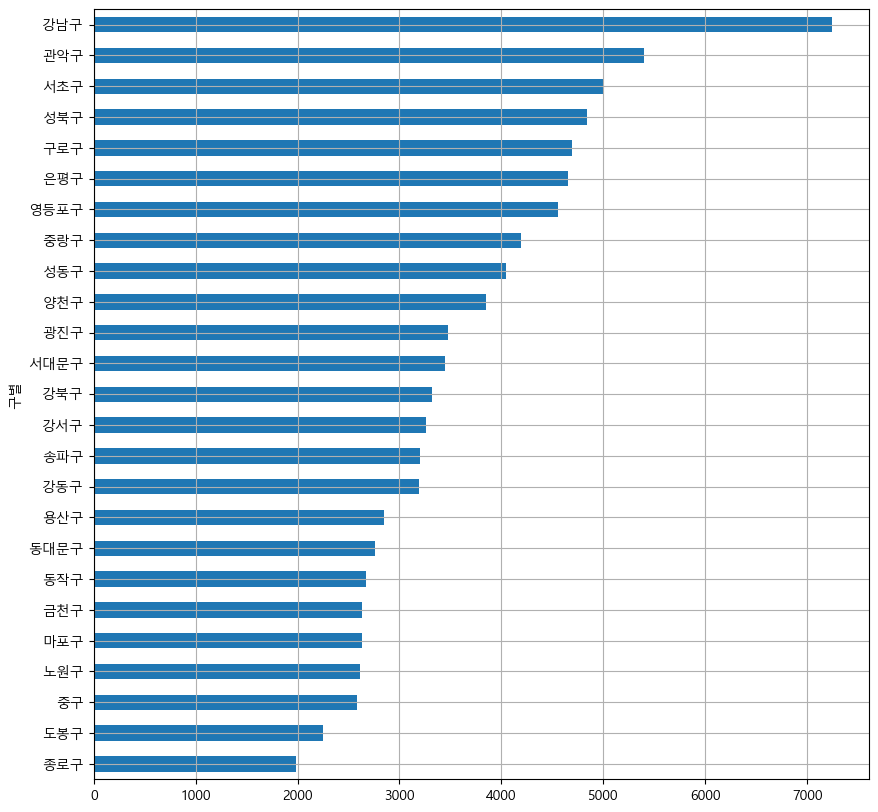

In [62]:
data_result['총계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

In [63]:
data_result['CCTV 비율'] = data_result['총계'] / data_result['인구수'] * 100
data_result

,총계,최근증가율,인구수,한국인,외국인,고령자,CCTV 비율
구별,,,,,,,
종로구,1980,189.897511,153255,143624,9631,28170,1.291964
중구,2584,778.911565,131673,122088,9585,24948,1.962437
용산구,2847,1657.407407,236632,222263,14369,39615,1.203134
성동구,4047,1415.730337,290664,283821,6843,47152,1.392329
광진구,3480,417.087667,352796,339893,12903,53009,0.986406
동대문구,2759,16129.411765,352743,337330,15413,63427,0.782156
중랑구,4193,536.267071,393147,388509,4638,73465,1.066522
성북구,4842,803.358209,443823,433559,10264,76257,1.090975
강북구,3321,8875.675676,300246,296653,3593,65317,1.106093


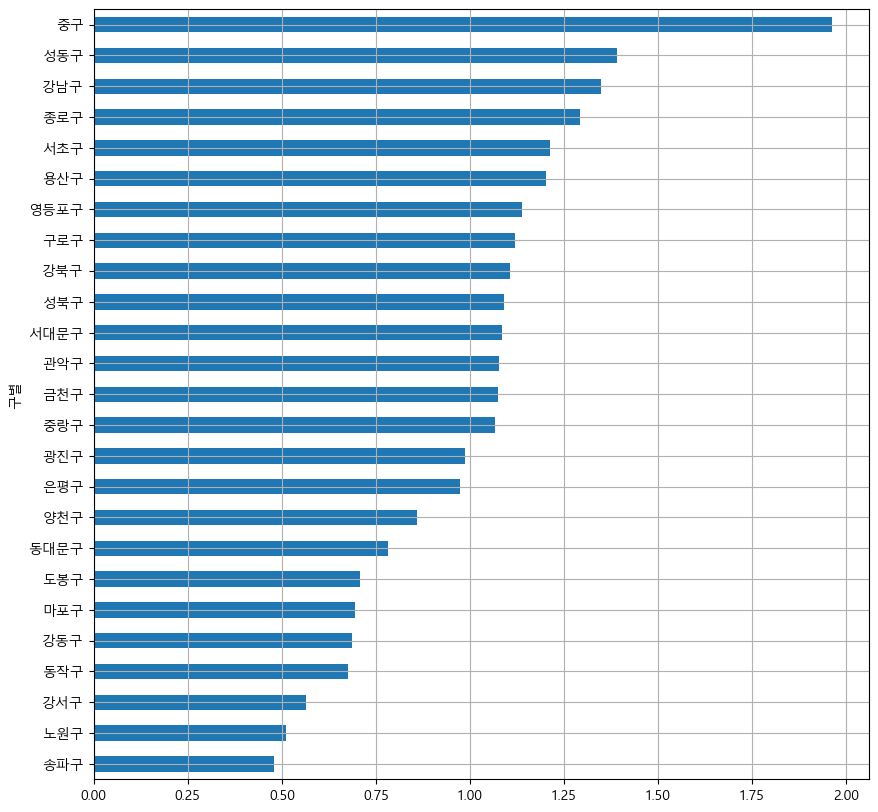

In [65]:
data_result['CCTV 비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

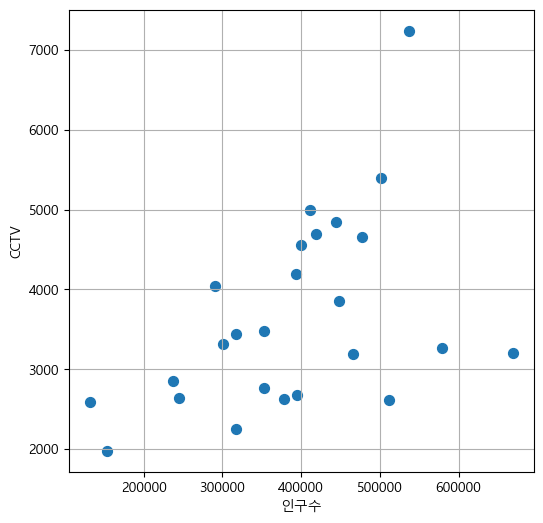

In [66]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [68]:
fp1 = np.polyfit(data_result['인구수'],data_result['총계'],1)
print(fp1)

[4.43067441e-03 1.93003375e+03]


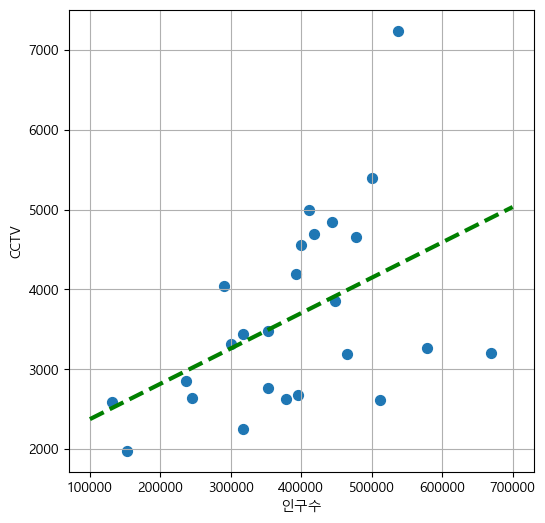

In [69]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)

plt.plot(fx, f1(fx), ls='dashed', lw = 3, color='g')

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [70]:
data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,CCTV 비율,오차
구별,,,,,,,,
강남구,7243,943.659942,536710,531777,4933,80335,1.349518,2934.978987
송파구,3203,1181.200000,668638,662961,5677,101086,0.479033,1689.551027
노원구,2617,758.032787,512162,508066,4096,90053,0.510971,1582.256818
관악구,5398,494.493392,500841,486946,13895,81247,1.077787,1248.902847
서초구,4995,2071.739130,411515,407672,3843,61711,1.213808,1241.677269


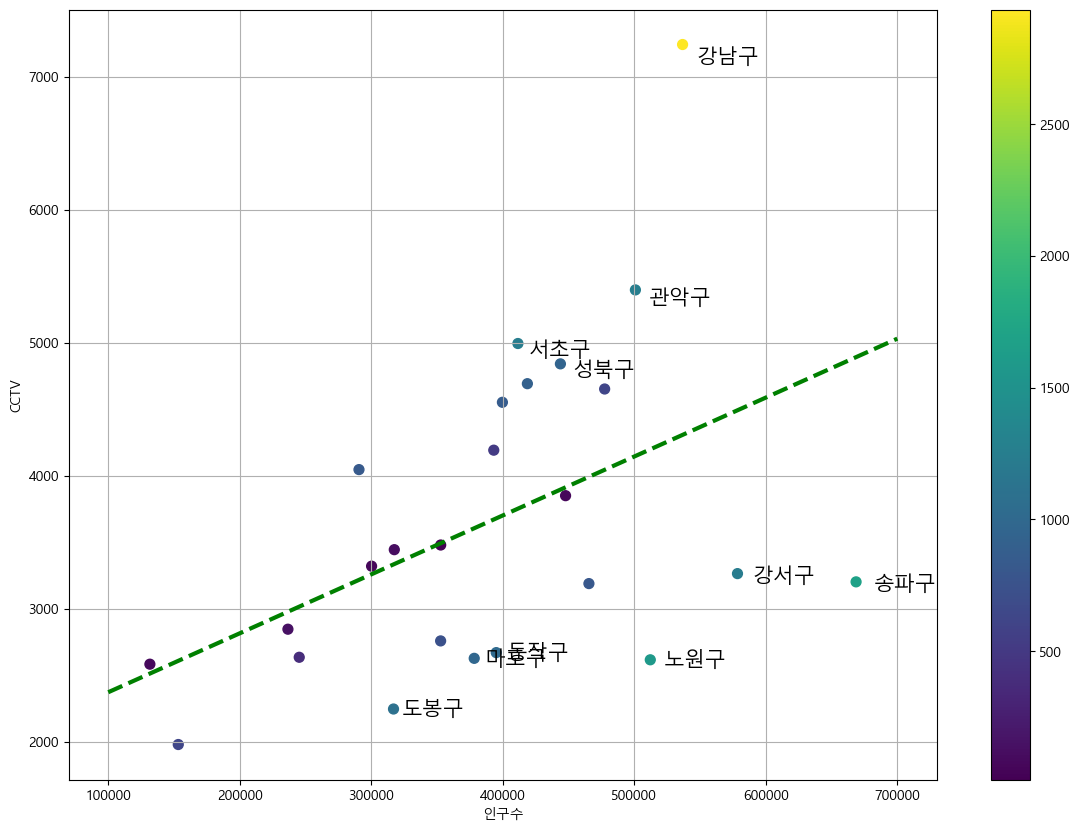

In [71]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['총계'], c=data_result['오차'], s = 50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color="g")

for n in range(10):
    plt.text(df_sort['인구수'][n]* 1.02, df_sort['총계'][n]*0.98,
            df_sort.index[n], fontsize=15)


plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()